In [4]:
import yt
import napari 
from yt_napari.viewer import Scene

In [3]:
ds = yt.load_sample("Enzo_64") # will download 2.57 G on the first run

yt : [INFO     ] 2025-06-26 10:19:17,645 'Enzo_64' is not available locally. Looking up online.
yt : [INFO     ] 2025-06-26 10:19:17,646 Downloading from https://yt-project.org/data/Enzo_64.tar.gz
100%|█████████████████████████████████████| 2.57G/2.57G [00:00<00:00, 7.59TB/s]
yt : [INFO     ] 2025-06-26 10:20:06,656 Untaring downloaded file to '/Users/chavlin/data/yt_data'
yt : [INFO     ] 2025-06-26 10:20:26,205 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2025-06-26 10:20:26,206 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-06-26 10:20:26,206 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-26 10:20:26,206 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-06-26 10:20:26,207 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-06-26 10:20:26,207 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2025-06-26 10:20:26,207 Parameters: omega_lambda   

In [5]:
v = napari.Viewer()
yt_scene = Scene()

Set the resolution to sample at: crank this up for more details if your machine can handle it:

In [7]:
res = (1200, 1200, 1200)

In [16]:
# plot the whole simulation
yt_scene.add_region(v,
                    ds,
                    ("enzo", "Density"),
                    colormap='magma',
                    contrast_limits=(-.28, 2.06),
                    take_log=True,
                    resolution= res)

In [17]:
v.dims.ndisplay = 3

In [22]:
v.camera.update({'center': (399.5, 399.5, 399.5),
 'zoom': 0.44163273255626356,
 'angles': (-14.990619816071016,
              22.976752039644087,
            48.051741515532996),
 'perspective': 0.0,})

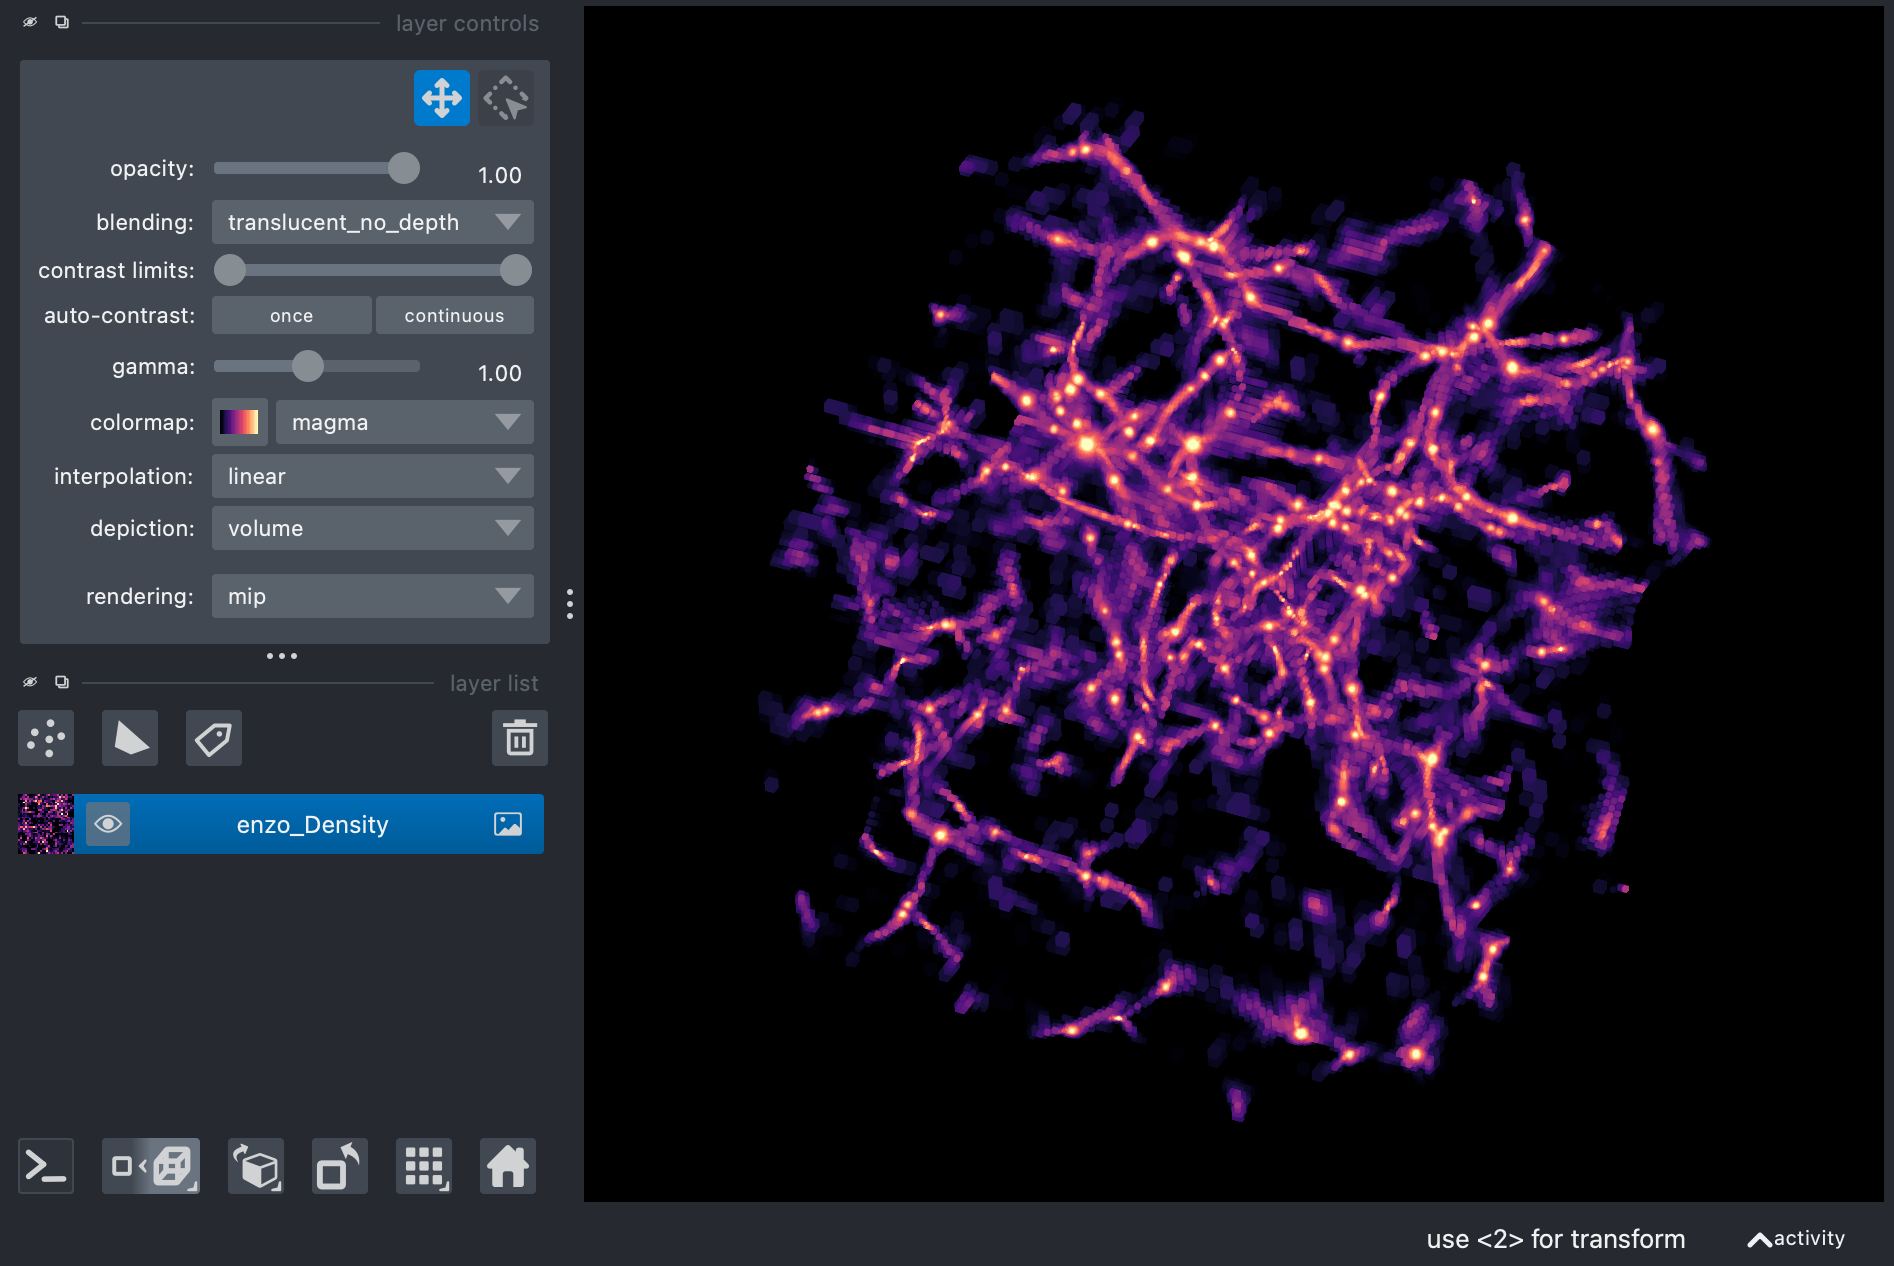

In [24]:
from napari.utils import nbscreenshot
nbscreenshot(v)

For reference, here's what a slice looks in yt like with the AMR grids overlaid: 

yt : [INFO     ] 2025-06-26 10:29:03,872 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-06-26 10:29:03,872 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-06-26 10:29:03,874 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-06-26 10:29:03,874 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-06-26 10:29:03,877 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



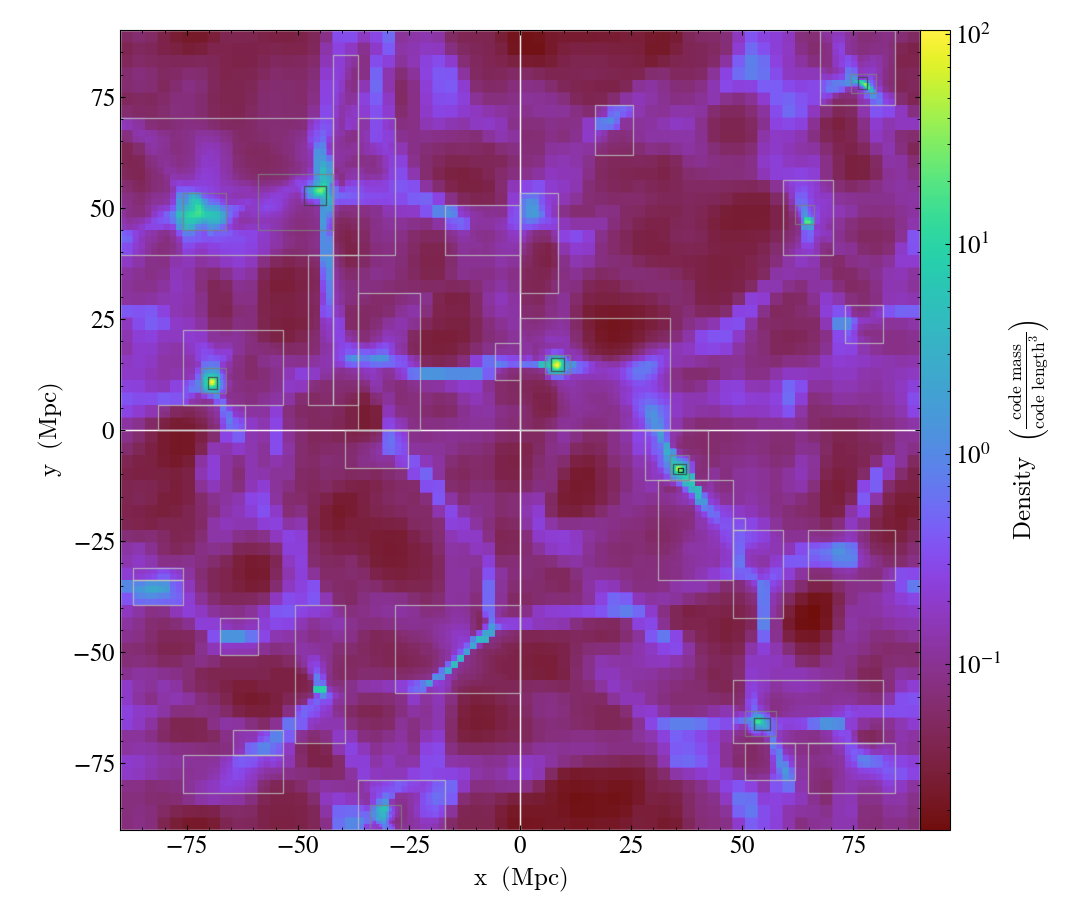

In [21]:
p = yt.SlicePlot(ds, 'z', ('enzo', 'Density'))
p.annotate_grids()

yt-napari resamples the AMR grid at a fixed resolution to load in napari.